In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('Advertising.csv')

In [4]:
df.shape

(200, 5)

In [5]:
df.sample(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
25,26,262.9,3.5,19.5,12.0
50,51,199.8,3.1,34.6,11.4
169,170,284.3,10.6,6.4,15.0
189,190,18.7,12.1,23.4,6.7
141,142,193.7,35.4,75.6,19.2


In [6]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
X = df.drop(columns=['Sales', 'Unnamed: 0'])  
y = df['Sales']


In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
scaler = StandardScaler()
X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)


In [10]:
model = LinearRegression()
model.fit(X_train_trf, y_train)


LinearRegression()

In [11]:
# Predict on the test set
y_pred = model.predict(X_test_trf)

In [12]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 4.50
R-squared (R2): 0.76


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train the Random Forest Regressor and make predictions
rf_regressor = RandomForestRegressor()
y_pred_rf = rf_regressor.fit(X_train, y_train).predict(X_test)

# Evaluate the model using Mean Squared Error (MSE) and R^2 score
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.5310441999999984
R^2 Score: 0.9714130321633817


In [14]:

rf = RandomForestRegressor()
rf.fit(X_train, y_train)


RandomForestRegressor()

In [15]:
import pickle 
pickle.dump(rf,open('model.pkl','wb'))

In [16]:
rf.predict(np.array([7.37,97,51]).reshape(1,3))

c:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([6.484])

In [17]:
import pandas as pd

# Assuming your original DataFrame has these feature names
feature_names = ['TV', 'Radio', 'Newspaper']

# Convert input to a DataFrame with proper column names
input_features = [[230.1, 37.8, 69.2]]  # Example input
input_df = pd.DataFrame(input_features, columns=feature_names)

# Transform using the scaler
scaled_input = scaler.transform(input_df)
prediction = model.predict(scaled_input)


In [18]:
scaler.fit(X.values) 

StandardScaler()

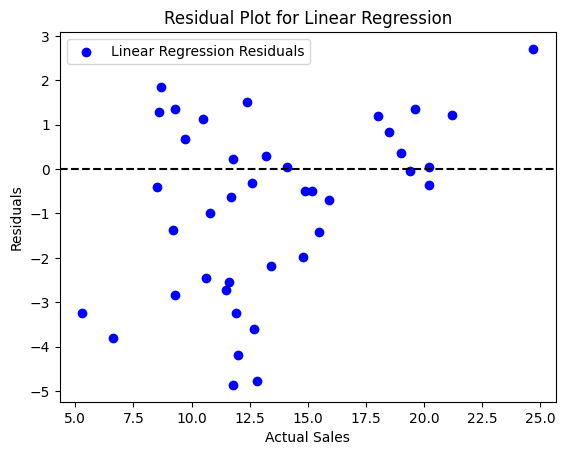

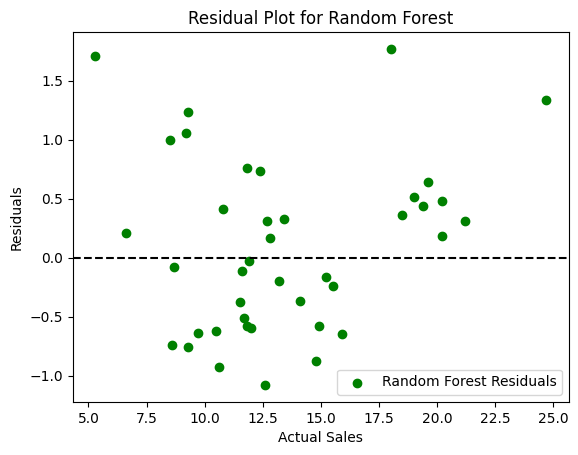

In [19]:
import matplotlib.pyplot as plt

# Linear Regression Residual Plot
plt.scatter(y_test, y_test - y_pred, color="blue", label="Linear Regression Residuals")
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel("Actual Sales")
plt.ylabel("Residuals")
plt.title("Residual Plot for Linear Regression")
plt.legend()
plt.show()

# Random Forest Residual Plot
plt.scatter(y_test, y_test - y_pred_rf, color="green", label="Random Forest Residuals")
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel("Actual Sales")
plt.ylabel("Residuals")
plt.title("Residual Plot for Random Forest")
plt.legend()
plt.show()


In [20]:
from sklearn.model_selection import cross_val_score

# Evaluate Linear Regression with Cross-Validation
cv_scores_lr = cross_val_score(model, X_train_trf, y_train, cv=5, scoring='r2')
print(f"Linear Regression Cross-Validation R²: {np.mean(cv_scores_lr):.2f}")

# Evaluate Random Forest with Cross-Validation
cv_scores_rf = cross_val_score(RandomForestRegressor(), X_train, y_train, cv=5, scoring='r2')
print(f"Random Forest Cross-Validation R²: {np.mean(cv_scores_rf):.2f}")


Linear Regression Cross-Validation R²: 0.91
Random Forest Cross-Validation R²: 0.98


In [21]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Pipeline MSE: {mse:.2f}")
print(f"Pipeline R²: {r2:.2f}")


Pipeline MSE: 4.50
Pipeline R²: 0.76
